<center><img alt="Dbian Data Scientist" width="100%" src="data/Imagens/Dbianbanner.png"></center>

<img alt="Colaboratory logo" width="7%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

####  Data Science na Prática 3.0
   - by [Dbian.io Data Scientist](https://www.linkedin.com/company/81834844/admin/)

### <center><strong> <em>PROJETO DE DATA SCIENTIST COM MACHINE LEARNING<em> <strong></center>

#### <center>PROJETO KC HOUSE COMPANY INCORPORADORA E IMOBILIÁRIA <strong></center> 

<center><img alt="Dbian Data Scientist" width="95%" src="data/Imagens/kc_house.jpg"></center>

#### APRESENTAÇÃO DO <em>`PROJETO` COM DETALHAMENTO `TÉCNICO` E PLANEJAMENTO 
   - PROBLEMA DE NEGÓCIO

  - Temos uma empresa chamada <em>`KC HOUSE COMPANY INCORPORADORA E IMOBILIÁRIA`<em>, que compra e vende imóveis, e a sua maior dificuldade dos "CEOS", é, saber qual o melhor valor de `"COMPRA"`, bem como qual o melhor valor de `"VENDA"`, para os imóveis em seu portfólio de produtos. Preciso encontrar um ponto de equilíbrio entre a compra, venda e consequentemente gerar receitas, com o melhor retorno possível.
  - Do ponsto de vista de inteligência de mercado competitiva, eles conseguirão nichar melhor o mercado, indentificando melhor seu cliente PERSONA, perdem menos tempo em compras, vendas, qualificaram melhor as oportunidades de negócios, gastam melhor o dinheiro em campanhas de marketing, serão mais assertivos e não perderão dinheiro nas vendas, aberão compor melhor seus preços.
  

####  <strong> A INCORPORADORA E IMOBILIÁRIA, COMPRA E VENDE IMÓVES <strong>
    
  - <strong> Aplicarei nesse projeto de compra e venda de Imóveis, Machine Learning <em>`Máquina Preditiva com RegressãoLinear`
   - <strong>Qual o objetivo? Saber como comprar mais e melhor bem bem como vender mais e melhor <em> `(Maximização dos Lucros)` <em>
    
    
   - <strong> Origem do banco de dados KAGGLE USA <strong>

#### <strong><em>`Debian` Technology and Data <em>`Science` for Business<strong>

 <strong>Linguagem de programação principal <em>`PYTHON` & `Livros` de apoio aos projetos e metodologias. <em><strong></center> 
  - Linguagem de programação nativa `PYTHON` https://www.python.org/
  - HTML
  - IDE de desenvolvimento do projeto `Jupyter-lab`
    - Data Scientist para Negócios
    - Python Data Scientist Handbook
 Obs: 
    - Para esse projeto em especial, usei formatação de fontes em HTML na IDE Jupyter Lab

### Bibliotecas "Ferramentas" Python para esse prejeto

In [1]:
# Importação das Bibliotecas comuns

"""Claudio Fabian Stychnicki
   Data Scientist"""

import pyforest
import warnings
import sklearn
import dateparser
import pandas as pd
import numpy  as np
from PIL import Image
import matplotlib as mpl
import scipy.stats as stats
import ipywidgets as widgets
import statsmodels.api as sm
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
from scipy.optimize import minimize
from datetime import datetime as dt
from datetime import datetime, timedelta
from IPython.display import display, HTML

# Bibliotecas de Machine Learning

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import residuals_plot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import model_selection as ms
from sklearn import metrics         as m
from sklearn.metrics import r2_score
from sklearn import linear_model 


# Comando para consultar lista dos parâmetros "rcParams". Fontes e familias das fontes para gráficos e etc...
#plt.rcParams
# plt.rcParams.update({'axes.spines.right': False, 'axes.spines.top': False})
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False

# Formatando com pd.set_option as views (visões)
pd.set_option('display.float_format','{:.2f}'.format) 
# Definindo a fonte padrão para os plots que serão implementados nesse projeto, bem como mapas e gráficos em geral optei por fonte "Verdana" 
mpl.rc('font', family = 'Verdana')

# Desabilitando Avisos comuns desnecessáriosplt.rcParams:
warnings.simplefilter(action='ignore', category=FutureWarning)


### Importando a base de dados da <em>`Kc House Company Incorporadora e Imobiliária`<em>
  - checando as dimensões do dataset, `conjunto de dados`


In [2]:
# Iportando e lendo a base de dados
         
file_path = ('data/kc_house_data.csv')
df_kc = pd.read_csv(file_path).copy()


# Codigo para checar as dimensões do conjunto de dados e imprimir três linhas da base

print('Python traga as dimensões do Dataset\n')
print('Dimensões do Dataset colunas:\t {}'.format( df_kc.shape[1] ))
print('Dimensões do Dataset linhas: \t {}\n'.format( df_kc.shape[0] ))
print( 'Python Start Base' ),
print( 'Base de Dados Importada com Sucesso' )
print('Python print as primeiras três linhas\n')

df_kc.head(3)

Python traga as dimensões do Dataset

Dimensões do Dataset colunas:	 21
Dimensões do Dataset linhas: 	 21597

Python Start Base
Base de Dados Importada com Sucesso
Python print as primeiras três linhas



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062


### Análise Exploratória do Cojunto de Dados importado para entendermos como os dados estão distribuidos, seus atributos e suas relações

  - Primeira impressão dos dados: nem sempre a casa com maior número de quartos é a mais cara, assim como o maior preço não tem o maior número de quartos, no mínimo (curioso), precisamos investigar mais a fundo esse fenômeno, talvez haja a necessidade de fazer eng. de atributos nesse conj. de dados.
   - Aplicarei um filtro para entendimento das relações entre quartos e preços, bem como área construida e localização dos imóveis 

In [3]:
# Anaálise estatística do conjunto de dados, e aliminação da variável que é criada COUNT logo acima da variável mean, essa contategem é redundante e desnecessária nesse momento
# Logo podemos observar alguns dados discrepantes, por exempplo, casa com 33 quartos, será? Até pode ter, mas esse imóvel acaba comprometendo as métricas e médias em gereal, vamos
# investigar melhor o número de "OUTLIERS" e faremos a Eng. de Atributos, limpando, filtrando e muito mais.

df_kc.describe().drop( ['count'] )

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,291.73,1971.00,84.46,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,442.67,29.38,401.82,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [4]:
# Checagem das vaáveis e seus tipos "dpypes" está tudo okay

# df_kc.info()

### Checagem de dados ausentes `dados nulos NAN`

  - Dados NaN (Not a Number) representam dados missing, que são registros que não existem ou que se perderam dentro do conjunto da base de dados

In [5]:
# Checando dados ausentes. Essa base em especial está muito bem estruturada, sem dados ausentes

pd.set_option('display.float_format','{:.4f}'.format)  

print('Python imprima colunas com dados ausentes:\n',
          '\nCheck quantidade (%) ','\n')
              
with pd.option_context( 'display.max_rows', (5), 'display.max_columns', None ):
  print((( df_kc.isnull().sum() / df_kc.shape[0]) * 100 ).sort_values(ascending = False ))

Python imprima colunas com dados ausentes:
 
Check quantidade (%)  

id           0.0000
grade        0.0000
              ...  
price        0.0000
sqft_lot15   0.0000
Length: 21, dtype: float64


In [6]:
# Análise dos dados ou valores únicos do datasete. Por convensão, fazemos essa abordagem para termos uma ideia da distribuição das ocorrências de registros únicos por variável
# Ex: zipcode-cep: temos um total de "70" diferentes ceps na base, esse é o objetivo do uso desse check

print('Python imprima valores únicos para cada variável\n')
check_valores_unicos = []
for i in df_kc.columns[0:21].tolist():
    print(i, ':     ', len( df_kc[i].astype(str).value_counts() ))
    check_valores_unicos.append(len( df_kc[i].astype(str).value_counts() ))

Python imprima valores únicos para cada variável

id :      21420
date :      372
price :      3622
bedrooms :      12
bathrooms :      29
sqft_living :      1034
sqft_lot :      9776
floors :      6
waterfront :      2
view :      5
condition :      5
grade :      11
sqft_above :      942
sqft_basement :      306
yr_built :      116
yr_renovated :      70
zipcode :      70
lat :      5033
long :      751
sqft_living15 :      777
sqft_lot15 :      8682


### Engenharia de Atritubos do Dataset

  - Farei alguns tratamentos, exclusões e criação de novos atritutos, bem como novas variáveis para aplicação de ML - Machine Learning;
   - Análise e criação de novas `"feactures", e atributos" caractetísticos` para agregar nas análises.

In [7]:
# Código para imprimir formato de data e hora, mínima, média e máxima. Tratamento das datas para formato tipo "datetime" 

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d' )
df_kc.date = pd.to_datetime(df_kc.date)

pd.set_option('display.float_format','{:.3f}'.format)
data_inicio = pd.to_datetime(df_kc['date']).dt.date.min()
data_fim    = pd.to_datetime(df_kc['date']).dt.date.max()
print('Python imprima perído dos dados\n')
print('Data inicial: \t ', data_inicio,'')
print('Data final:   \t ', data_fim, '')
print('\nTransformação executada com sucesso')          
print('\nData e tempo transformados = dtype:',
df_kc.date.dtypes,'\n');

Python imprima perído dos dados

Data inicial: 	  2014-05-02 
Data final:   	  2015-05-27 

Transformação executada com sucesso

Data e tempo transformados = dtype: datetime64[ns] 



### Aplicarei um Split na variável date-data, e criarei novas variáveis para enriquecer as análises futuras

  - Separação das datas para criar varável idade do imóvel, para juntar-se à lista de atributos preditivos, e também separar ano e mês da variável "date" origem tabela
  - Crio coluna ano corrente, ano tabela original para análises posteriores
   - Criarei a variável quantidade metragem quadrada de cada imóvel. 
     - OBS: 1 pé quadrado, ou `m²`, corresponde a (0,09), com essa variável atrituto conseguimos saber por exemplo, o preço do metro quadrado por região

In [8]:
# Função para sesparar, criar e retornar "ano e mês separados"

def year_extract( date ):
    
    return date.year 

df_kc[ 'ano' ] = df_kc[ 'date' ].apply(lambda date: date.year)
df_kc[ 'mes' ] = df_kc[ 'date' ].apply(lambda date: date.month)

#  Retorna idade dos imóveis
df_kc['ano_corr'] = 2022
df_kc[ 'idade_imovel' ]    = df_kc[ 'ano_corr' ] - df_kc[ 'yr_built' ]

# Retorma a quantidade de metro² da sala de estar por imóvel
df_kc[ 'm²_living' ]       = df_kc[ 'sqft_living' ]* 0.092

# Retorma o valor do metro² dos imóveis por região em área "construída"
df_kc[ 'valor_m²_const' ]  = df_kc[ 'price' ] / df_kc [ 'm²_living' ]

# Retorma o valor do metro² dos imóveis por região em área "total" 
df_kc[ 'valor_m²_imovel' ] = df_kc[ 'price' ] / df_kc [ 'sqft_lot' ]

### Aplicação de Alguns filtros e agrupamentos para entendermos melhor e podermos intender os proximos processos

In [9]:
# Filtro por price-preços, para enxergarmos os fatores de relação

df_kc = df_kc.sort_values(by=['price'], ascending=False)
df_kc.iloc[  :1, -10: ]

,long,sqft_living15,sqft_lot15,ano,mes,ano_corr,idade_imovel,m²_living,valor_m²_const,valor_m²_imovel
7245,-122.323,3940,8800,2014,10,2022,112,1108.600,6945.697,278.986


In [10]:
# Análise mais detalhada de dois casos de outliers. Obs:. Aquip podemos ver pelo preço que não é compatível com a quantidade de quartos constante, no mínimo
# Essa quantidade de quartos foi registro errado, porque uma casa com 33 não custaria 640k.
# Filtro com quartos acima de 10 para vermos como os dados estão dispostos

df_kc.loc[df_kc['bedrooms'] > 10 ] 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,ano,mes,ano_corr,idade_imovel,m²_living,valor_m²_const,valor_m²_imovel
15856,2402100895,2014-06-25,640000.000,33,1.750,1620,6000,1.000,0,0,...,-122.331,1330,4700,2014,6,2022,75,149.040,4294.149,106.667
8748,1773100755,2014-08-21,520000.000,11,3.000,3000,4960,2.000,0,0,...,-122.363,1420,4960,2014,8,2022,104,276.000,1884.058,104.839


<IPython.core.display.Javascript object>

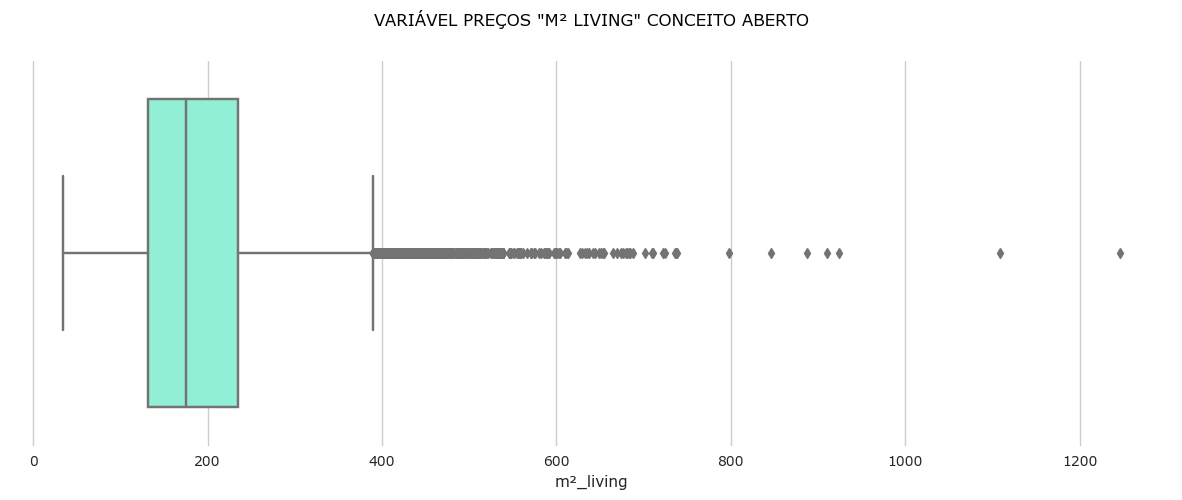

In [11]:
# Boxplot do atributo price, preço, para visualizar como ficaram as distribuições no conjunto de dados.

mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False

plt.figure(figsize=(15,5))
sns.boxplot(df_kc['m²_living'], color='#80FFDB')
plt.title( 'VARIÁVEL PREÇOS "M² LIVING" CONCEITO ABERTO', pad=25, fontsize=12, color='#020202' );

plt.show()

<IPython.core.display.Javascript object>

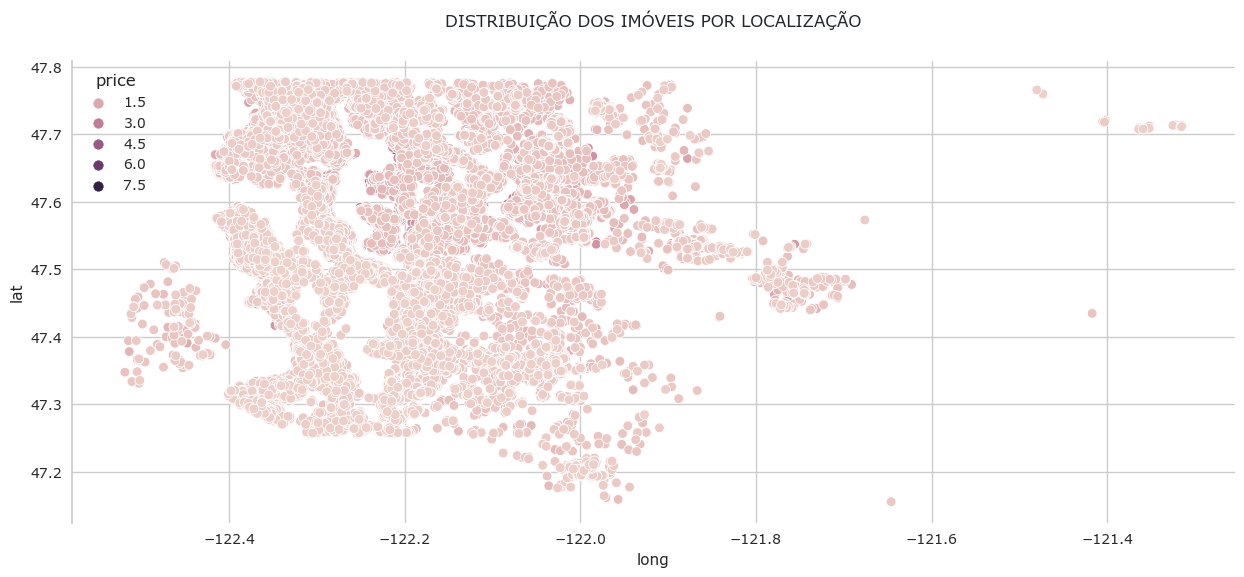

In [12]:
# Mapa dispersão dos preços e localização

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False

plt.figure(figsize=(15, 6))
sns.scatterplot( x='long', y='lat', color='Red',  hue="price", data=df_kc )
plt.title( 'DISTRIBUIÇÃO DOS IMÓVEIS POR LOCALIZAÇÃO', pad=25, fontsize=12, color='#212529' );

plt.show()

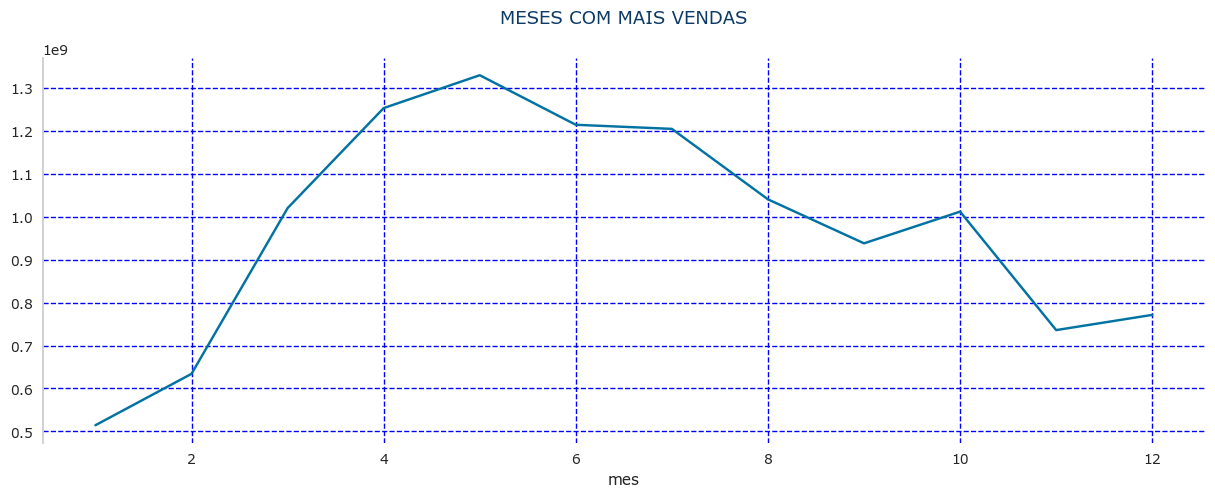

In [13]:
# Grafico com mêses e maior voolume de negócios

plt.figure(figsize=(15,5))
df_kc.groupby('mes').sum()['price'].plot()

plt.grid( True,
            axis ='both',
            color = 'Blue',
            linestyle ='--',
            linewidth = 1 ),
plt.title( 'MESES COM MAIS VENDAS', pad=25, fontsize=13, color='#0D3B66' )

plt.show()

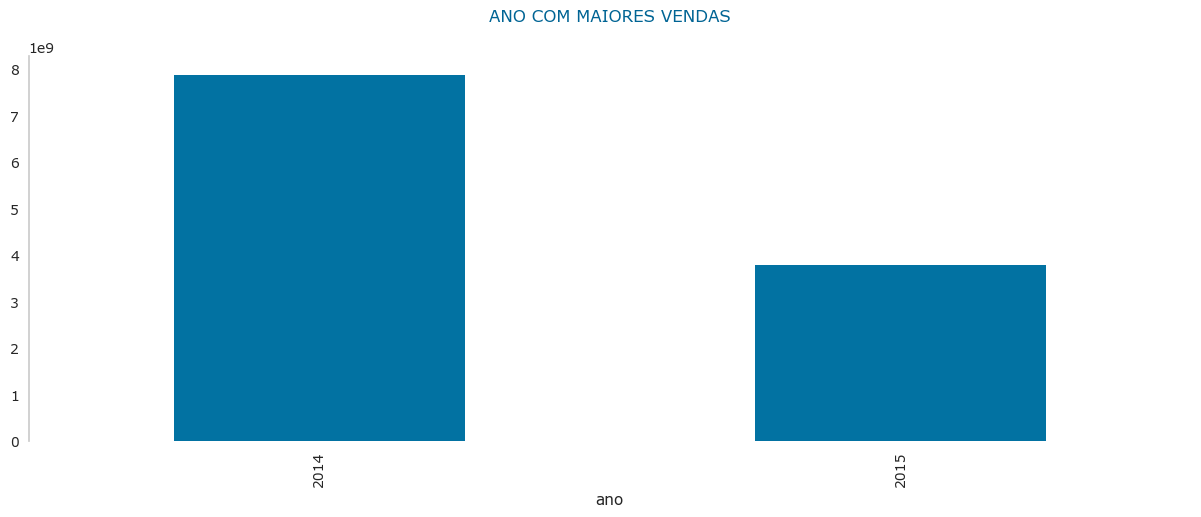

In [14]:
# Grafico com mêses e maior voolume de negócios

plt.figure(figsize=(15,5))
df_kc.groupby('ano').sum()['price'].plot.bar()
plt.grid( None ),       
plt.title( 'ANO COM MAIORES VENDAS', pad=25, fontsize=12, color='#006494' );

plt.show()

### Outliers - são dados, que por algum motivo estão muito acima da média para este Dataset em específico.

   - Checagem dos valores acíma de "7milhões", são dois casos conforme mostra nossos dados acima com BOXPLOT, que ficam entre 7 e 8Milhões;
     - Dada as informações contidas no Boxplot, podemos com maior clareza enxergar; que a maioria dos valores dos imóveis estão concentrados entre 1 e 3 milhões;
     - Acima de 75% estão os valores discrepantes ou Outliers, que precisamos dar um tratamento, ou podemos comprometer nossa predição dos valores de compra e venda
     - Podemos ver abaixo pela data de construção "yr_built", que os imóveis 3910 e 7245, são imóveis centerários, com quantidades de quartos superiores a 4 e banheiros 8. Imóveis mais antigos e com características que os diferenciam dos demais.
     - Poderia simplesmente excluí-los, mas prefiro tratar, passando o valor da moda.
     - Obs:. Fiz alguns testes e ví que a média ponderada não mudava muito se exclísse ou tratasse os dados, então optei por seguir em frente e somentre tratar
       - Adotarei novos procedimentos.

### Usarei a Função <em>`SCIPY Stats.Zscore Python`<em> para abaixo estruturar um plot de correlação e conhecer melhor os feactures e atributos do Dataset
  - Basicamente,  um z-score é o número de desvios padrão em relação à média de um ponto de informação. Seja como for, ainda mais, na verdade, é uma proporção do número de desvios padrão abaixo ou acima dos dados em análise de forma bruta, também chamado de pontuação padrão, podendo e eu usrei em dispersões.
    
   - Com Z-scores, faço uma abordagem para contrastar resultados de um teste com dados desse conjunto, dados em “comum”. Os resultados de testes ou estudos têm um grande número de resultados e unidades potenciais. No entanto, esses resultados podem parecer regularmente bons e não servirvir para nada. 
Por exemplo, perceber que o peso de alguém é de 150 Kg pode ser um dado relevante, mas na hipótese de que você precisa confrontá-lo com um peso de um indivíduo cujo peso é de 70 Kg, não diz muito,  mas se alimentarmos os dados com mais pesos de outros indivíduos, podemos ter mais informações que serão relevantes. Um z-score pode lhe revelar onde o peso desse indivíduo é contrastado com o peso médio da população normal.
    
  - Podemos tirar insights por exmplo análisando o número de obesos de uma população, como estão distribuidos, levando em conta outros atributos e variáveis como: bairro, cidade, estado, idade, sexo, formação, cargo ocupado e outros atritutos que nos darão um mapa Z-SCORES, podendo or exemplo servir para alguns planos de ação.
    
  - A função scipy.stats.zscore (arr, axis = 0, ddof = 0) calcula a pontuação Z relativa dos dados de entrada, em relação à média da amostra e ao desvio padrão.
    - `Exclusão da coluna waterfront, vista para o mar, nesse momento não terá peso para a predição`
    - Exclusão da coluna "id", para um describe com menos variáveis
    

In [15]:
# Separaçã de um lista com uma amostra para o Zscore scipy, abaixo aplico describe do Z-score com 13 "atributos" das entidades

df_kc = df_kc[ ( np.abs(stats.zscore( df_kc[[ 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                                              'floors', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 
                                              'sqft_living15','sqft_lot15', 'm²_living', 'valor_m²_const', 'valor_m²_imovel',
                                           ]] )) < 2 ).all( axis=1 ) ]

In [16]:
# Excluindo algumas colunas que não são necessárias nesse momento, e também para ajustar o tamanho do Dataset origem

df_kc.drop( [ 'id', 'waterfront', 'date', 'ano_corr', 'mes', 'ano' ], axis=1, inplace=True )

In [17]:
# Análise descritiva para entendimento das distríções dos dados ( comportamento das variáveis numéricas desse dataset ) e removendo a linha index "count" contagem, que normalmente 
# aparece acima do index mean. 

df_kc.describe().drop( [ 'count' ] )

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,idade_imovel,m²_living,valor_m²_const,valor_m²_imovel
mean,436950.518,3.313,1.989,1889.160,9630.925,1.435,0.013,3.303,7.452,1679.435,...,69.449,98074.826,47.548,-122.206,1872.031,9029.971,49.820,173.803,2587.439,67.415
std,185440.122,0.747,0.635,617.763,9194.278,0.477,0.113,0.460,0.892,631.411,...,365.843,53.398,0.146,0.138,527.615,7537.159,27.507,56.834,895.242,49.726
min,82000.000,2.000,0.750,560.000,940.000,1.000,0.000,3.000,6.000,480.000,...,0.000,98001.000,47.156,-122.502,620.000,651.000,7.000,51.520,952.046,2.317
25%,295000.000,3.000,1.500,1420.000,5240.000,1.000,0.000,3.000,7.000,1190.000,...,0.000,98031.000,47.438,-122.318,1480.000,5269.250,28.000,130.640,1870.357,32.522
50%,400000.000,3.000,2.000,1830.000,7540.000,1.000,0.000,3.000,7.000,1530.000,...,0.000,98058.000,47.553,-122.215,1790.000,7597.000,46.000,168.360,2461.589,52.280
75%,543625.000,4.000,2.500,2300.000,9899.000,2.000,0.000,4.000,8.000,2100.000,...,0.000,98117.000,47.683,-122.121,2220.000,9600.000,68.000,211.600,3142.061,87.574
max,1270000.000,5.000,3.500,3890.000,97661.000,2.500,1.000,4.000,10.000,3440.000,...,2015.000,98199.000,47.778,-121.319,3350.000,67268.000,122.000,357.880,5252.611,276.986


### Análise descritiva da variável idade_imóvel ( construção ), observa-se abaixo que:
  - Temos 19.633 imóveis sendo que a médida de idade é de 51 anos
  - Idade mínima 7 anos, e máxima 122 anos.
  - 25 % dos imóveis têm 26 anos
  - 50 % dos imóveis têm 48 anos
  - 75 % dos imóveis têm 71 anos 

In [18]:
# Describe - Descritivo para análise da média, mínima e máxima de idade dos imóveis

df_kc.idade_imovel.describe().drop( [ 'count' ] ).reset_index()

,index,idade_imovel
0,mean,49.820
1,std,27.507
2,min,7.000
3,25%,28.000
4,50%,46.000
5,75%,68.000
6,max,122.000


 Método utilizado para análise de correlação "perarson" 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

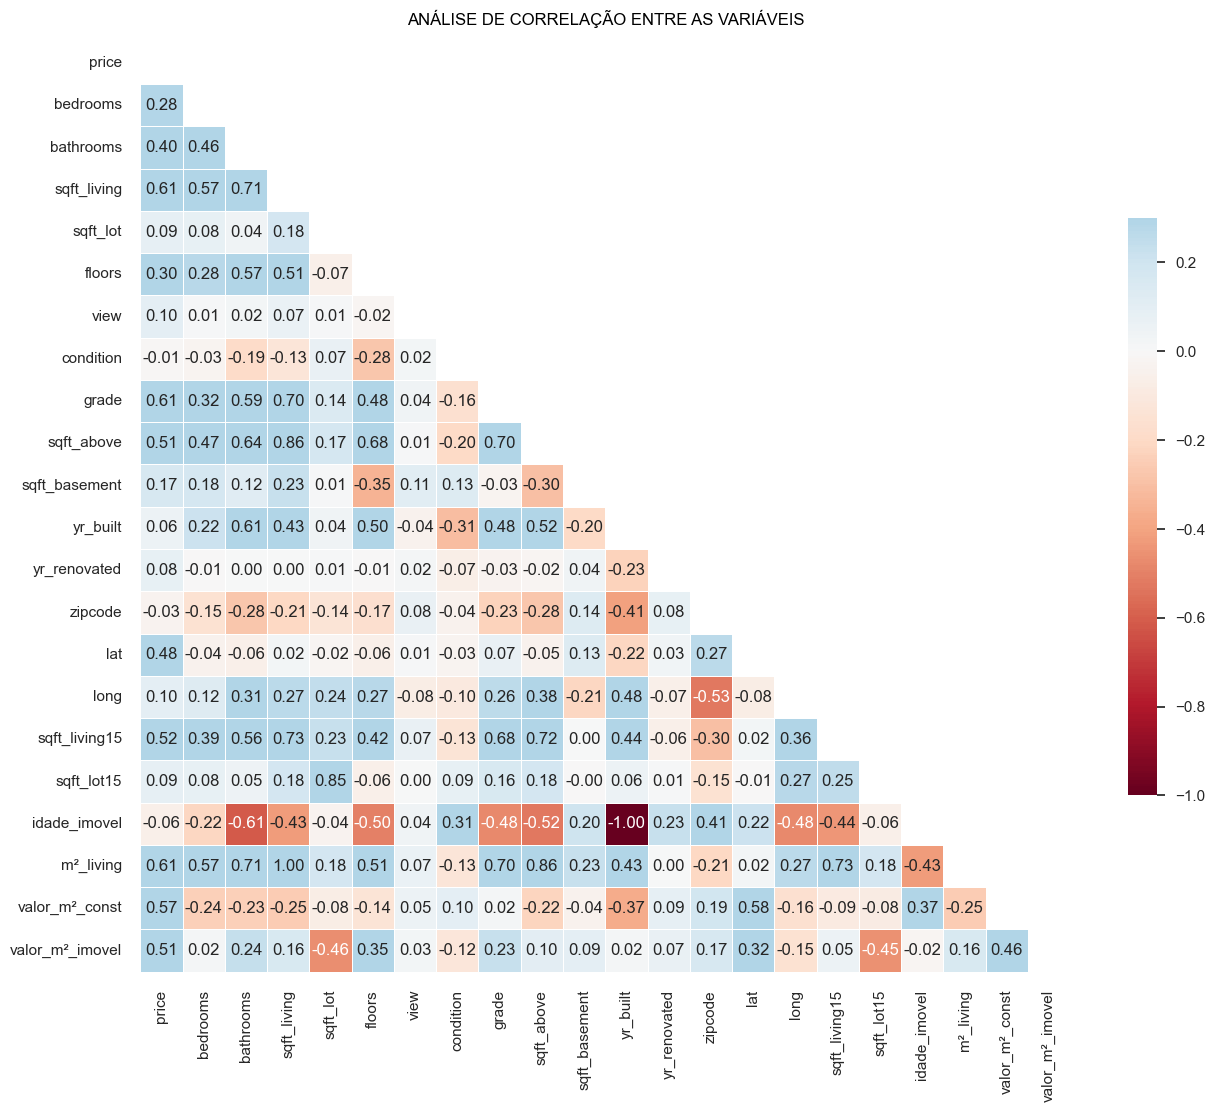

In [19]:
# Grafico de correlação do cojunto de dados e suas variáveis de atributos

print( ' Método utilizado para análise de correlação "perarson" ' )
sns.set_theme( style='white' )
corr = df_kc.corr( method ='pearson' )
mask = np.triu( np.ones_like( corr, dtype=bool ))

f, ax = plt.subplots( figsize=( 15, 15 ))
cmap = sns.diverging_palette( 230, 20, as_cmap=True )
sns.heatmap( corr, mask=mask, cmap='RdBu', fmt='.2f', 
             vmax=.3, center=0, square=True, linewidths=.5, 
             annot = True, cbar_kws={"shrink": .5} );
plt.title( 'ANÁLISE DE CORRELAÇÃO ENTRE AS VARIÁVEIS', pad=12, fontsize=12, color='Black' )

plt.show()

In [20]:
# Imprimendo as correlações entre as colunas, isso nos mostra o quão é importante essa análise. Por ex: preço está diretamente relaciodo com grade (avaliação do imóvel)
# Metragem de área construída e valor por metro quadrado dependendo da região dos USA. Já nesse caso em especial o atributo waterfront, frente para o mar, não está influênciando, 
# Se fosse no Brasil, muito provavelmente estaria entre as 6 primeiras, provavelmente e para alguns casos, logo abaixo de bedrroms, quantidade de quartos.

display( corr[ 'price' ].sort_values(ascending=False) )

price              1.000
m²_living          0.607
sqft_living        0.607
grade              0.607
valor_m²_const     0.573
sqft_living15      0.518
valor_m²_imovel    0.507
sqft_above         0.507
lat                0.480
bathrooms          0.405
floors             0.298
bedrooms           0.285
sqft_basement      0.165
long               0.101
view               0.100
sqft_lot           0.091
sqft_lot15         0.090
yr_renovated       0.082
yr_built           0.058
condition         -0.012
zipcode           -0.033
idade_imovel      -0.058
Name: price, dtype: float64

In [21]:
# Agrupamento para checar os atributos quartos e preço para ver como ficaram as distribuições de preço e número de quartos, depois de tratá-los.
# Renomeei as colunas criadas min e max para preço_min e preço_max com número de quartos-bedroomns a esquerda, a ideia aqui é análisar o min e max dos preços

df_kc_agrupado = ( df_kc.groupby( 'bedrooms' ) [ 'price' ].agg( [min, max] ).sort_values(by=[ 'min', 'max' ], ascending=False )).reset_index()
df_kc_agrupado = df_kc_agrupado.rename( columns ={'min': 'preço_min', 'max': 'preço_max' } )
df_kc_agrupado.head()

,bedrooms,preço_min,preço_max
0,4,139000.000,1260000.000
1,5,133000.000,1250000.000
2,2,84000.000,1090000.000
3,3,82000.000,1270000.000


Multiplos histplots das variávei mais correlacionadas


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

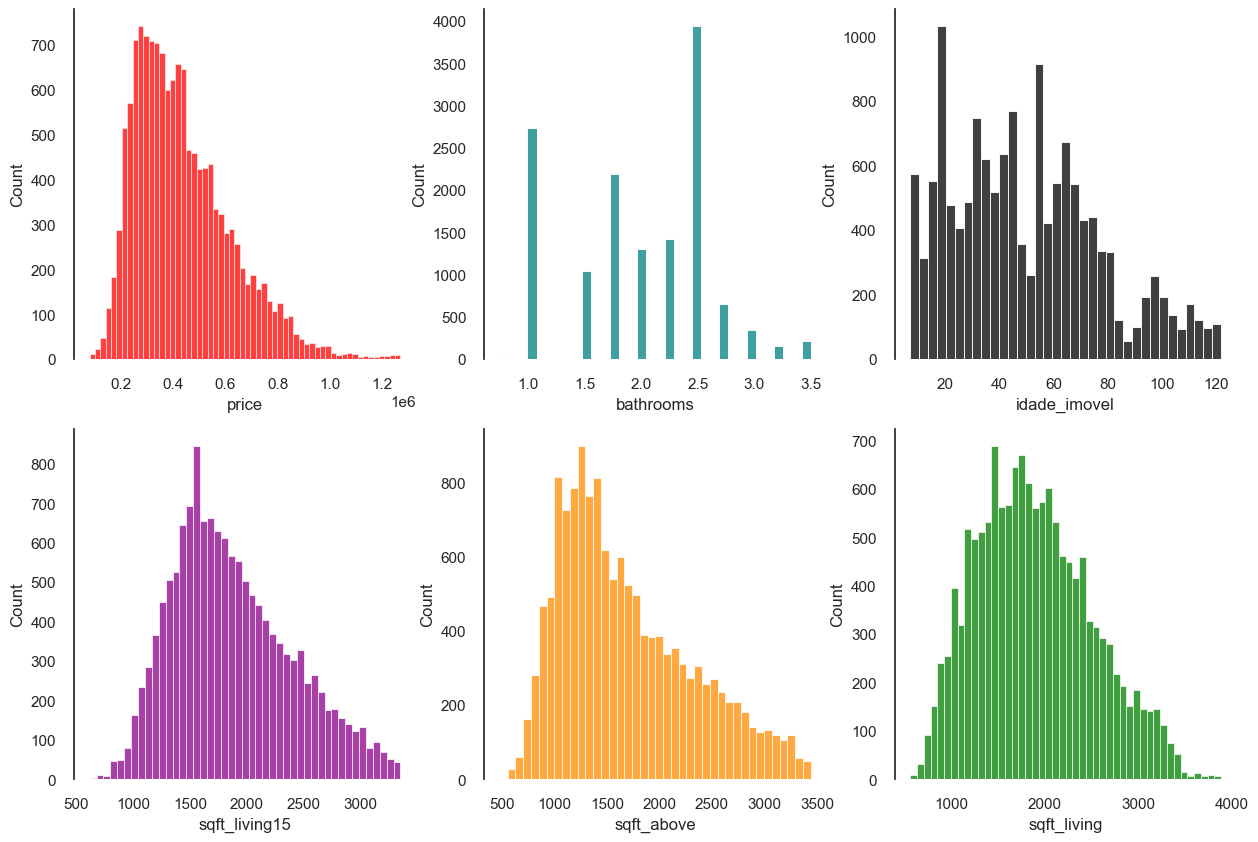

In [22]:
# Geração de histplots para análise das variáveis (atributos dos imóveis e como elas estão distribuidas, ou aglutinadas)
# Aqui checamos cadas uma delas em separado conforme lista acima. Observando metragem da área em (pé² quadrado/'sqft_living15', 'sqft_above') 
# temos com 15mil metros² e acima de 15mil metros².


mpl.rcParams['axes.spines.left']   = True
mpl.rcParams['axes.spines.right']  = False
mpl.rcParams['axes.spines.top']    = False
mpl.rcParams['axes.spines.bottom'] = False

print( 'Multiplos histplots das variávei mais correlacionadas' .center(-1) )

fig, axs = plt.subplots( nrows=2, ncols=3, figsize=(15,10) )

sns.histplot( df_kc['price'],         ax=axs[0][0], color='Red' )
sns.histplot( df_kc['bathrooms'],     ax=axs[0][1], color='Teal' )
sns.histplot( df_kc['idade_imovel'],  ax=axs[0][2], color='Black' )
sns.histplot( df_kc['sqft_living'],   ax=axs[1][2], color='Green' )
sns.histplot( df_kc['sqft_living15'], ax=axs[1][0], color='DarkMagenta' )
sns.histplot( df_kc['sqft_above'],    ax=axs[1][1], color='DarkOrange' );

Multiplos Disperçores da variável preços


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

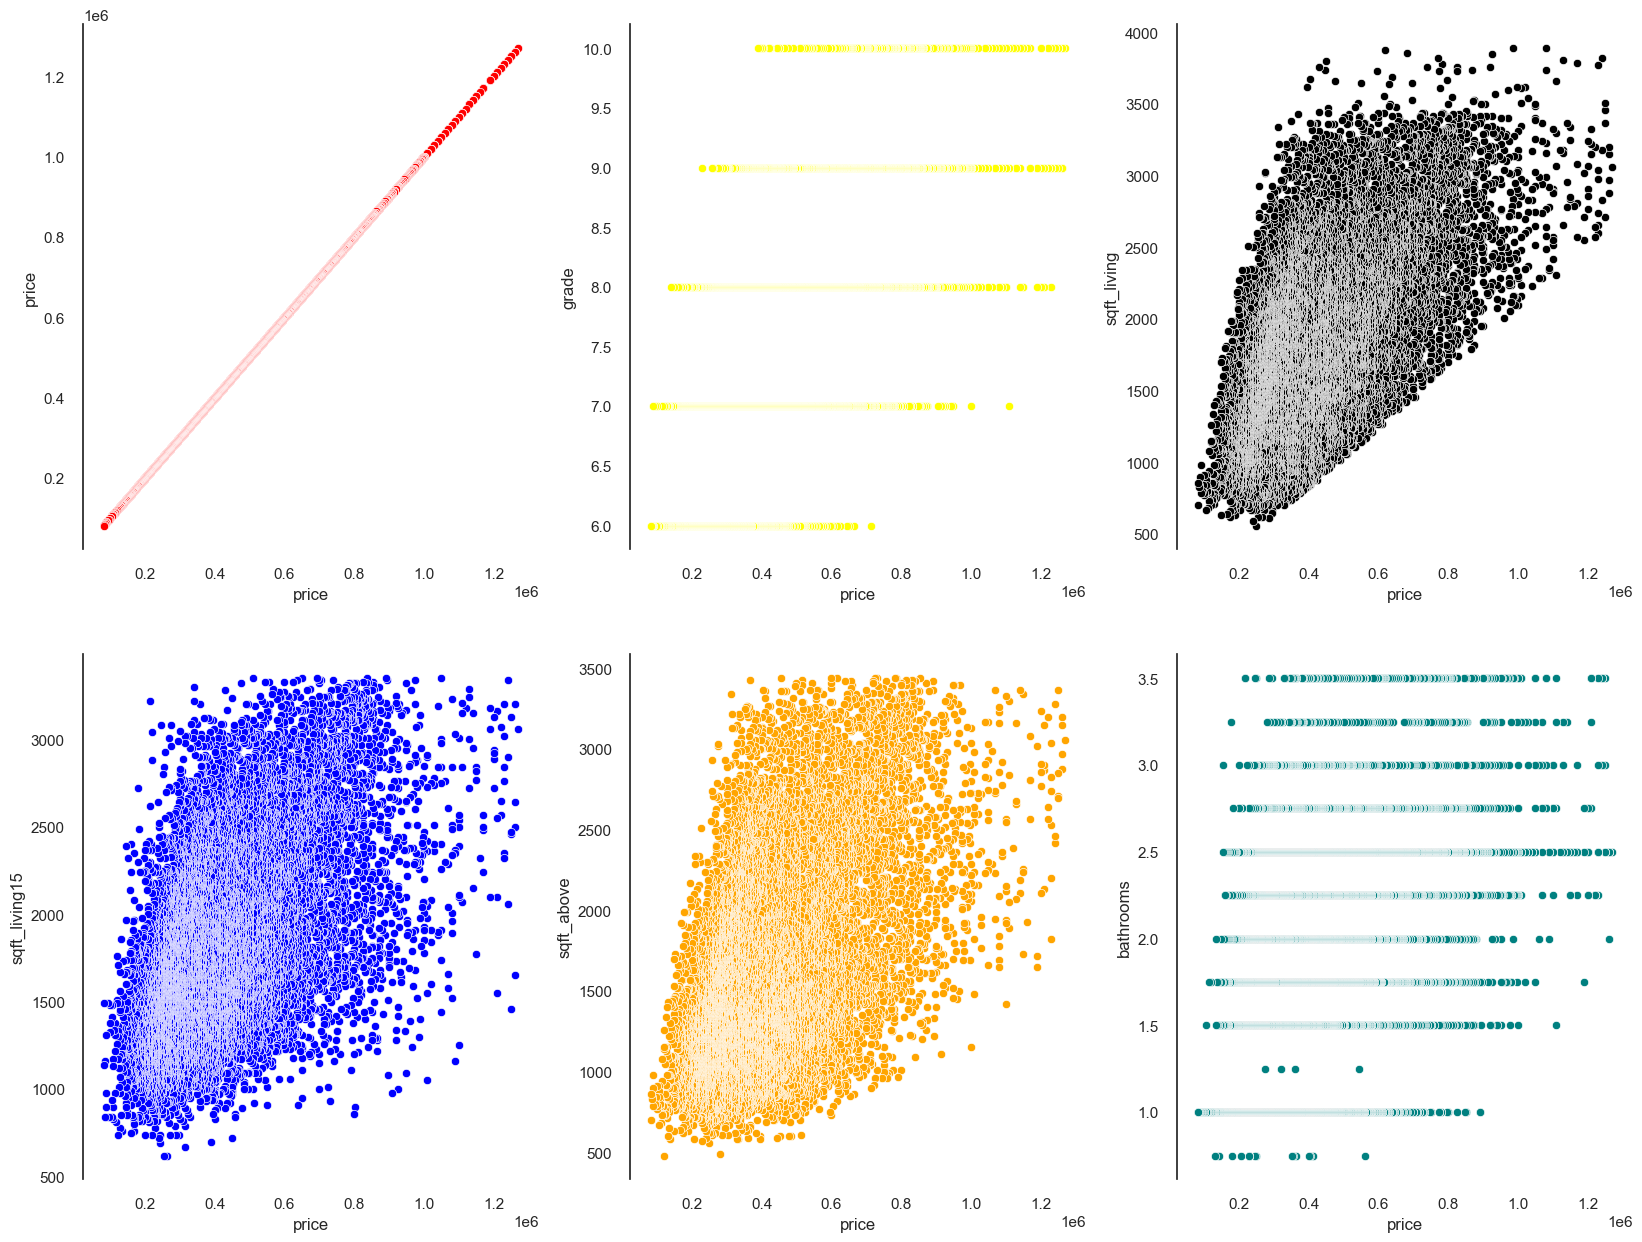

In [23]:
# Aplicação de disperções para análise das variáveis (atributos dos imóveis) - cruzando preço com a variável que mais se correlaciona

mpl.rcParams['axes.spines.left']   = True
mpl.rcParams['axes.spines.right']  = False
mpl.rcParams['axes.spines.top']    = False
mpl.rcParams['axes.spines.bottom'] = False

print( 'Multiplos Disperçores da variável preços' .center(-1) )

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,15))

sns.scatterplot( data=df_kc, x='price', y='price',         ax=axs[0][0], color='Red' )
sns.scatterplot( data=df_kc, x='price', y='grade',         ax=axs[0][1], color='Yellow' )
sns.scatterplot( data=df_kc, x='price', y='sqft_living',   ax=axs[0][2], color='Black' )
sns.scatterplot( data=df_kc, x='price', y='sqft_living15', ax=axs[1][0], color='Blue' )
sns.scatterplot( data=df_kc, x='price', y='sqft_above',    ax=axs[1][1], color='Orange')
sns.scatterplot( data=df_kc, x='price', y='bathrooms',     ax=axs[1][2], color='Teal');

### Analisando as visões com os gráficos em geral
  - Observando as variaveis de atributos, se comparadas com preço, verificamos que temos um formato de cone, onde quanto maior o preço, mais dispersão dos valores ou o contrário também é verdadeiro afirmar.

  - Os dados da forma que estão estruturados, tem esse comportamento, isso faz sentido. Com esses dados podemos afirmar que casas mais caras provavelmente levam em consideração mais atributos como, (localização, infraestruturas do bairro e etc.). Já as cadas com menor "valor" provavelmente so levam em consideração as variaveis analisadas e atributos que não são inerentes ao conjunto de casas dos dados análisados aqui.

  - Podemos melhorar esses indicadores, com modelagem e alguns ajustes nas variáveis de atributos para reduzir as multicoliniaridades. O que são as variáveis de multicoliniaridade? 
  - São variáveis de atributos e isso é comum em regressão linear, onde as variáveis independentes possuem relações lineares exatas ou quase exatas, para regressão linear ou melhor, para modelos de predição com "Machine Learning", não é bom.
  
  - Detalhe importante: Se R2 for alto e as correlações parciais são baixas, a multicolinearidade é uma possibilidade. Quando isso acontece uma ou mais variáveis podem ser desnecessárias no modelo. Se R2 for alto e as correlações parciais também, a multicolinearidade pode não ser detectável de imediato.
  
  - Exemplo prático:
   - Entre as variáveis 'sqft_living' e 'sqft_living15' existe uma forte correlação da casa de (0.72), isso faz sentido?
    - Faz! Porque são imóveis que encontran-se no mesmo bairro, padrão identicos cujo perfil de comprador é muito em específico em alguns casos.
Para esses dados, farei a criançao de uma nova variavel para melhorar as métricas e predições do modelo, distringuindo melhor os atributos.
Criarei uma variável delta, entre 'sqft_living' e 'sqft_living15', dividindo por 'sqft_living15', com isso
conseguimos uma media, métrica de diferenciação para os tamanhos das casas, e comparamos com as demais casas do bairro.

<IPython.core.display.Javascript object>

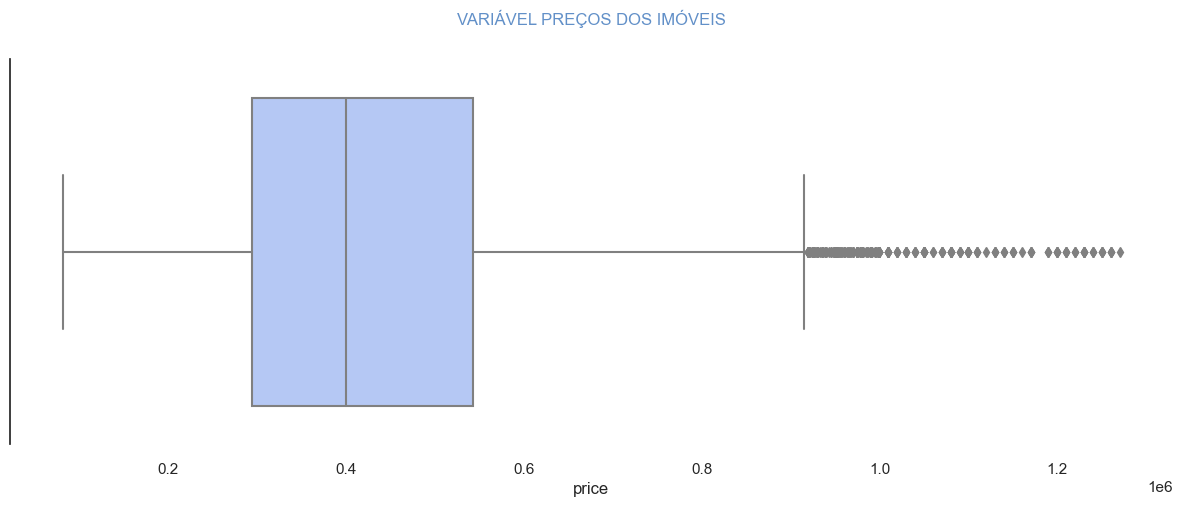

In [24]:
# Boxplot do atributo price, preço, para visualizar como ficaram as distribuições no conjunto de dados.

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False

plt.figure(figsize=(15,5))
sns.boxplot(df_kc['price'], color='#ABC4FF')
plt.title( 'VARIÁVEL PREÇOS DOS IMÓVEIS', pad=25, fontsize=12, color='#6290C8' );

plt.show()

In [25]:
# Engenharia de atributos. Aplicarei a criação de um delta para melhorar as predições de preços de compra e vendas dos imóveis.
# Com essa nova variável, podemos tentar melhorar as aproximações ou distânciameto de uma variável para outra

print('Engenharia de Atributos\n')

df_kc[ 'diff15_abs' ] = ( df_kc[ 'sqft_living' ] - df_kc[ 'sqft_living15' ] ) / df_kc[ 'sqft_living15' ]

print ('Absoluto Máximo:', max(df_kc['diff15_abs']))
print ('Absoluto Mínimo:', min(df_kc['diff15_abs']))

print('')
corr = df_kc.corr(method ='pearson')
print(corr['diff15_abs'].sort_values(ascending=False))

Engenharia de Atributos

Absoluto Máximo: 2.861111111111111
Absoluto Mínimo: -0.7169117647058824

diff15_abs         1.000
m²_living          0.509
sqft_living        0.509
bedrooms           0.341
sqft_above         0.328
bathrooms          0.327
sqft_basement      0.323
price              0.232
floors             0.198
grade              0.168
valor_m²_imovel    0.156
yr_renovated       0.098
zipcode            0.069
yr_built           0.061
lat                0.010
view               0.008
sqft_lot          -0.010
condition         -0.015
sqft_lot15        -0.039
idade_imovel      -0.061
long              -0.064
sqft_living15     -0.177
valor_m²_const    -0.243
Name: diff15_abs, dtype: float64


### PipeLine de Preparação da Base para os trabalhos de criação do modelo de predição com `Machine Learning`
  - Separação das variáveis para treinamento da máquina em: <em>`"X_train e X_test, y_train e y_test"`
    - 1) Preparando as features - recursos para modelagem da minha máquina
     - 2) Variável de resposta
### Processo de separação dos dados para treinamento e teste da máquina
  - Em x_train, irei exluir a coluna preços e datas, fazendo as separações
    - Em y_train, criarei um cópia da coluna preços
      - Obs:. Aplicarei um modelo de regressão simples, porque minha variável de resposta é numérica e meu problema de negócio requer regressão linear.

### Primeiro Modelo a ser implementado

In [26]:
# Separação dos dados para treinamento e teste da máquina preditiva 

x_train = df_kc.drop( [ 'price' ], axis=1 )
y_train = df_kc[ 'price' ].copy()

In [27]:
# Checagem da exclusção da coluna price (preços), passada para x_train

x_train.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,...,zipcode,lat,long,sqft_living15,sqft_lot15,idade_imovel,m²_living,valor_m²_const,valor_m²_imovel,diff15_abs
19957,3,2.500,3060,9576,2.000,0,3,10,3060,0,...,98004,47.593,-122.199,3060,9579,17,281.520,4511.225,132.623,0.000
12021,4,2.000,2970,5400,2.500,0,4,9,2970,0,...,98112,47.623,-122.309,2500,5040,122,273.240,4611.331,233.333,0.188
15754,4,2.500,3150,13700,2.000,0,4,9,3150,0,...,98040,47.531,-122.224,3200,11900,56,289.800,4347.826,91.971,-0.016


In [28]:
# Checagem da coluna price (preços), passado para y_train

y_train.head(3)

19957   1270000.000
12021   1260000.000
15754   1260000.000
Name: price, dtype: float64

### Aplicação do `Modelo` para o Treinamento
  - Vou instânciar a lineRegression ou Regressão Linear para treino dos dados já separados (split)

### `Modelo de predição`

### Performance das Métricas do Modelo Criado
   - Passando o modelo copiado no ínicio, `df_raw` para dentro de outra variável, com isso aplico ao modelo novas abordagens

In [29]:
# Criando "dfp" que receberá o "df_pred", base original copiada

dfp = df_kc.copy()

### Ciclo seguinte, farei alguns ajustes e tratamentos para que não haja overfitting das métricas

   - A ideia para os proximos passos, é melhorar esse modelo para que o MAPE, seja reduzido, o ideal será que ele fique em torno de 7 a 10%;
    - Próximo passo ou ciclo, será o de evitar o `Overfitting e Underfitting` do modelo que treinamos, como?
      - Separando nossos dados de treino e teste e retreinarei o modelo

### Segundo ciclo: ajustes e tratamento do modelo

  - Procedimentos: vou escluir da base preços e data, passar para dentro de "X", com método drop do pandas
  - Passar para dentro de "y" preços, com copia.
   - Feita a separação, irei aplicar novo treinamento com método do `Sklearn train_test_split`

In [30]:
# Separação dos dados para treinamento e teste da máquina preditiva 

X = df_kc.drop( [ 'price' ], axis=1 )
y  = df_kc['price'].copy()

### Dados de treino e teste separados para o novo `aprendizado de máquina` e novas métricas

  - Separando 20%, para os testes, poderiamos separar até 30%, ou seja, proporção de 80-20 ou 70-30, mas eu prefiro nesse caso usar a proporção 80-20.
   - Já no caso do random_state esse número é aleatrório, normalmente por convenção separamos "42", essa prática garante que ele irá separar os mesmo números de linhas para treinamento e teste em partes iguais, poderíamos separar esta seed ou semente, em número maior, mas cada caso é um caso.

In [31]:
# Importando o método Sklearn train_test_split - separação com parâmetros random_state, e passo para dentro de uma variável classe chamada Select_metrics, ms.

train_X, test_X, train_y, test_y = ms.train_test_split( X, y, test_size=0.2, random_state=42 )

### Aplicação do `Modelo` para o Treinamento
  - Vou instânciar a lineRegression ou Regressão Linear para treino dos dados já separados (split)

In [32]:
# Descrição do Modelo para treinamento

model_lr = LinearRegression()
model_lr.fit( train_X, train_y )

LinearRegression()

In [33]:
# Predict - Modelo de predição criado 

pred = model_lr.predict( x_train )

### Modelo de `predição` para novo ciclo de treinamento encima dos meus dados de teste

In [34]:
# Predict - Novo modelo de predição pred_train, treinnamento e pred_test, teste aplicado para os próximos passos

predictions_train = model_lr.predict( train_X )
predictions_test  = model_lr.predict( test_X )

print( 'Imprimindo dados de treinamento e testes do modelo criado\n' )
print( '\nPredição com dados de treinamento:\n',           predictions_train [:5] ) 
print( '\nPredição com dados de teste:\n',     predictions_test  [:5] ) 

Imprimindo dados de treinamento e testes do modelo criado


Predição com dados de treinamento:
 [319155.26805255 315567.01356677 434604.90711678 622061.27987897
 113396.38637167]

Predição com dados de teste:
 [389922.54410968 671442.55461123 598686.86854763 259418.10387479
 344840.35373561]


### Performance das Métricas do Modelo Criado
   - Avaliaremos agora os dados de treino e dados de teste aplicados para esse novo ciclo
   
   - Aplicando novamente:
     - MAE  - Erro Médio Absoluto
     - MAPE - erro percentual absoluto médio

In [35]:
# Passando para m. de metrica a média absoluta do y_train e y_test com pred_train e pred_test
# Mape preciso aplicar a subtração para gerara as novas métricas

print( 'Imprimindo os dados dos erros médios das variáveis\n' )
# MAE: dados de treino em y
mae_train  = m.mean_absolute_error( train_y, predictions_train )
# MAPE:
print( '\nDados Absolutos de Erro MAE:', mae_train )
mape_train = np.mean( np.abs( ( train_y - predictions_train ) / train_y ) )
# MAE: dados de test em y
mae_test   = m.mean_absolute_error( test_y, predictions_test )
# MAPE:
print( 'Dados Absolutos de Erro MAPE:',  mape_train, '%' )
mape_test  = np.mean( np.abs( ( test_y - predictions_test ) / test_y ) )

Imprimindo os dados dos erros médios das variáveis


Dados Absolutos de Erro MAE: 32850.06563530056
Dados Absolutos de Erro MAPE: 0.08982828836856463 %


### Criando um DataFrame para para apresentar os dados de treino e testes
  - Criarei um dicionário para passar os dados de treino e teste
  
    - Objetivo será que meus dados de teste, possam ser menores que os dados de treino, assim podemos afirmar que meu "erro" foi diminuido ainda mais.
   
     - Lógica da métrica: quanto menor o percentil MAPE, melhor, mas isso pedenderá muito da qualidade dos dados extraídos para implementar a máquina preditiva.
    
      - Como análiso o desempenho? Análizando os dados de `teste`;
    - Embora ainda está alto, agora ficou mais próximo do objetivo fim, predizer os valores de compra e venda dos imóveis e baixar ainda mais. Os dados separados, performaram melhor depois de alguns ajustes, significa dizer que; o erro da <em>`PREDIÇÃO` está em média em torno de <em>`125 mil e 25%`, ainda é muito, farei ajustes para reduzir esse percentual ainda mais, só lembrado que estou relativizando.

### Análisando a performance do modelo criado com a variável pred, que recebeu o model_lr predict "x_train"

In [36]:
# Criando uma coluna nova "predicao", a usarei para conpor outras análises com outras variáveis que serão criadas

dfp[ 'predicao' ] = pred

### Considerações sobre a predição e erro

  - Observação da coluna erro, sobre erros negativos e erros positivos.
    - Quando tenho um valor positivo, significa dizer que o valor de venda do imóvel foi menor, a maquina subestimou o valor de venda, se comparado com o valor real do imóvel. 
    - Quanto tenho um valor negativo, significa dizer que o valor é maior do que o valor real de venda do imóvel, significa dizer que houve uma superestimaçção de venda do modelo
     - Como resolver essa questão? vamos resolver mais a frente com tecnica adequada.

In [37]:
# Criação de uma coluna com a dirença do preço do imóvel original e a predição de venda, assim consigo aplicar outras análises com novas variáveis;
# Farei o seguinte: quero a soma da coluna erro, não importando se são positivos ou negativos, quero os valores absolutos "abs", para isso; 
# Usarei um método do numpy.np.abs, para que eu possa avaliar as proximas tratativas;
# Criarei uma coluna percentual, desta forma, relativiamos os percentuais em relação ao preço de vendas dos imóveis;

dfp[ 'erro' ]          = dfp[ 'price' ] - dfp[ 'predicao' ]
dfp[ 'erro_abs' ]      = np.abs( dfp[ 'erro' ] )
dfp[ 'erro_perc' ]     = np.abs( ( dfp[ 'price' ] - dfp[ 'predicao' ] ) / dfp[ 'price' ] )
dfp[ 'erro_perc_abs' ] = np.abs(dfp[ 'erro_perc' ] )

In [38]:
# Checando na coluna predicao, o que efetivamente resultou da predicão feita, treinamento do modelo

dfp[[ 'price', 'predicao', 'erro', 'erro_abs', 'erro_perc', 'erro_perc_abs' ]].head(10)

,price,predicao,erro,erro_abs,erro_perc,erro_perc_abs
19957,1270000.000,1012587.303,257412.697,257412.697,0.203,0.203
12021,1260000.000,1022528.060,237471.940,237471.940,0.188,0.188
15754,1260000.000,995070.253,264929.747,264929.747,0.210,0.210
7165,1260000.000,1005800.218,254199.782,254199.782,0.202,0.202
19892,1260000.000,1015181.426,244818.574,244818.574,0.194,0.194
8368,1250000.000,1022759.202,227240.798,227240.798,0.182,0.182
20802,1250000.000,1019224.635,230775.365,230775.365,0.185,0.185
7323,1250000.000,996744.902,253255.098,253255.098,0.203,0.203
12905,1250000.000,1076858.319,173141.681,173141.681,0.139,0.139
13578,1240000.000,1025743.279,214256.721,214256.721,0.173,0.173


In [39]:
# Vou dividir a soma da coluna erro_abs por ela mesma e achar uma média

# np.sum(dfp[ 'erro_abs' ] ) / len(dfp[ 'erro_abs' ])

# Posso também chamar o mean do numpy e fazer a média direto

np.mean(dfp[ 'erro_abs' ] )

33038.39920551589

### Prevendo Números: Entendendo as métricas R², MAE - MAPE - MSE e RMSE, Acurácia e Erro
   - A métrica R², também conhecida como R-dois ou coeficiente de determinação, representa o percentual da variância dos dados que é explicado pelo modelo. Os resultados variam de 0 a 1, geralmente também são expressos em termos percentuais, ou seja, variando entre 0% e 100%. Quanto maior é o valor de R², mais explicativo é o modelo em relação aos dados previstos. Na equação 2 é mostrado o cálculo desta métrica, no qual y e ŷ os valores reais e previstos, respectivamente, e y-barra representa a média dos valores reais.
  
### Erro Médio Absoluto
O erro médio absoluto (MAE — do inglês Mean Absoluto Error), como demonstrado na equação 3, mede a média da diferença entre o valor real com o predito. Mas por haver valores positivos e negativos, é adicionado um módulo entre a diferença dos valores. Além disso, esta métrica não é afetada por valores discrepantes — os denominados outliers.

### Erro Percentual Absoluto Médio
O erro percentual absoluto médio (MAPE — do inglês Mean Absolute Percentual Error) é uma métrica que mostra a porcentagem de erro em relação aos valores reais. Na equação 4 representa o cálculo de MAPE que basicamente se parece com MAE, mas com o acréscimo de uma divisão por |y|. Então se o resultado de MAPE for igual a 40% significa que o nosso modelo faz previsões que em média a diferença entre o valor previsto e o real equivale a 40% do valor real tanto para mais quanto para menos.

### Erro Quadrático Médio
O erro quadrático médio (MSE — do inglês Mean Squared Error) é uma métrica que calcula a média de diferença entre o valor predito com o real, como a métrica MAE. Entretanto, ao invés de usar o módulo do resultado entre o valor de y e ŷ, nesta métrica a diferença é elevada ao quadrado. Desta maneira penalizando valores que sejam muito diferentes entre o previsto e o real. Portanto, quanto maior é o valor de MSE, significa que o modelo não performou bem em relação as previsões.

### Raiz do Erro Quadrático Médio
A raiz do erro quadrático médio (RMSE — do inglês, Root Mean Squared Error) é basicamente o mesmo cálculo de MSE, contendo ainda a mesma ideia de penalização entre diferenças grandes do valor previsto e o real. Porém, para lidar com o problema da diferença entre unidades, é aplicada a raiz quadrática como demonstrado na equação 6. Assim a unidade fica na mesma escala que o dado original, resultando em uma melhor interpretabilidade do resultado da métrica.

### Acurácia do Modelo
Quando falarmos sobre modelos de classificação, tratamos os testes e performance do modelo - métricas, como `"ACURÁCIA"` do modelo.

### Erro do Modelo
Quando falarmos sobre modelos de Regressão em especial, tratamos os testes e performance do modelo - métricas, como `"ERRO"`, existe uma certa confusão entre esses termos em trando-se de Regressão.
  

In [40]:
# Aplicarei o método np.abs para achar uma média ponderável e vendas dos imóveis em percentual
# mean absolute erros - MAE

mae = np.mean(dfp[ 'erro_abs' ] )
print('Valor médio relativo de venda "MAE"\n')
print( 'MAE: R$ {:.3f}'.format( mae ) )

Valor médio relativo de venda "MAE"

MAE: R$ 33038.399


In [41]:
# Chamei método np.abs para achar uma média ponderável e vendas dos imóveis em percentual
# mean absolute erros - MAE

mape = np.mean(dfp[ 'erro_perc_abs' ] )
print('Valor médio relativo  "MAPE"\n')
print( 'MAPE: {:.4f}'.format( mape ),'%' )

Valor médio relativo  "MAPE"

MAPE: 0.0902 %


In [42]:
# Criei um DataFrame para guardar e imprimir MAE E MAPE

print( 'Resultado Mae e Mape em Percentil\n' ),
data_house = {
'Dataframe': [ 'treinamento', 'teste' ],
'MAE'      : [ mae_train, mae_test ],
'MAPE (%)' : [ mape_train, mape_test ] 
             }
pd.DataFrame( data_house )

Resultado Mae e Mape em Percentil



,Dataframe,MAE,MAPE (%)
0,treinamento,32850.066,0.090
1,teste,33791.599,0.092


### PipeLine de Modelos Regressores de Machine Learning para preços de compras e vendas, com novos Modelos e Ajustes

  - Fiz a montagem do `PipeLine` de treinamento do algoritmo de `Machine Learning - IA`, com modelo de Regressão Linear;
    - O objetivo não era nesse primeiro momento é me preopcupar a performance do modelo e features, atributos do conjunto de dados;
      - Apliquei os conceitos de teste do modelo, utilizando MAE e MAPE e criei métricas para validar o desempenho da regressão linear;
      - Trabalharei com outros modelos para testar as performances dos modelos de Machine Learning - Predição;
      
      - Consegui reduzir de 125 mil e 25% em média o MAE: R$ 33038.399 e MAPE: 0.0902 %, aparentemente mais estável e mais assertivo. Testarei outraos modelos e retreinarei os modelos
        - Obs:. Sobre o modelo acima, posso concluir que meus dados de treino e teste, ficaram com uma taxa "média" de erro entre ( 9/10 % ), acima ou abaixo, comparando com os dados preditos (previsão de preço de vendas dos imóvies). 
      
      


In [43]:
# Criando um "DataFrame" e passando para o "x", gerar o "vif_kc" Fator de Variância e Inflação
# Como essa variável  "'m²_living" está fazendo a direrença, ela ficou com uma correlação forte se comparada com as demais variáveis, somando chegaremos à quase 70 pontos

x = df_kc[[  'm²_living', 'bedrooms', 'bathrooms', 'valor_m²_const' ]]

print('\nFatores de Variação Influênciadores\n' )
vif_kc = pd.DataFrame() 
vif_kc[ 'Atritutos_Feactures' ] = x.columns 
vif_kc[ 'VIF' ] = [ variance_inflation_factor( x.values, i ) for i in range( len( x.columns ))] 

print( vif_kc )


Fatores de Variação Influênciadores

  Atritutos_Feactures    VIF
0           m²_living 24.904
1            bedrooms 21.201
2           bathrooms 21.350
3      valor_m²_const  5.575


### Resultado Esperado com os novos modelos
  - Baixar ainda mais a diferença da predição, o máximo que conseguir com o treinamento de novos modelos e ajustes de Atritutos
  - O modelo está adequando-se, mas ainda faz sua previsão com foco nos impóveis com valores maiores, imóveis mais caros, com esse modelo, consegui baixar para 124 contra o modelo acima 127, ainda é pouco, vou aplicar outros métodos e modelos para que a predição seja uniforme, preciso achar o <em>`Breack Even Point`<em>
  - Observei que o eixo do modelo está em torno de zero (0), o que indica uma distribuição quase que normal, estou no caminho certo.

In [44]:
# Aplicação de um novo modelo Regressor Linear - Separação de uma lista para testes com "sqft_living','grade','bathrooms"

reg = LinearRegression()
# X_train = df_kc [['grade', 'valor_m²_const', 'valor_m²_total', 'bathrooms' ]]
X_train = df_kc[[ 'm²_living', 'bedrooms', 'bathrooms', 'valor_m²_const'  ]]
y_train = df_kc[ 'price' ]
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)

print( 'Atritutos de predição: sqft_living, grade e bathrooms\n' )
print( 'Constante:            \t', reg.intercept_ )
print( 'Coeficientes:         \t', reg.coef_ )
print( 'R-quadratico:         \t%.4f'% r2_score( y_train, y_pred ))
print( 'R-quadratico Ajustado:\t%.4f'% (1 - ( 1-reg.score( X_train, y_train )) * (len ( y_train )-1 ) / ( len( y_train )-X_train.shape[1]-1 )) )

Atritutos de predição: sqft_living, grade e bathrooms

Constante:            	 -446005.34610824235
Coeficientes:         	 [2524.34396802 3504.26085078 8140.01149559  160.93833679]
R-quadratico:         	0.9302
R-quadratico Ajustado:	0.9301


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

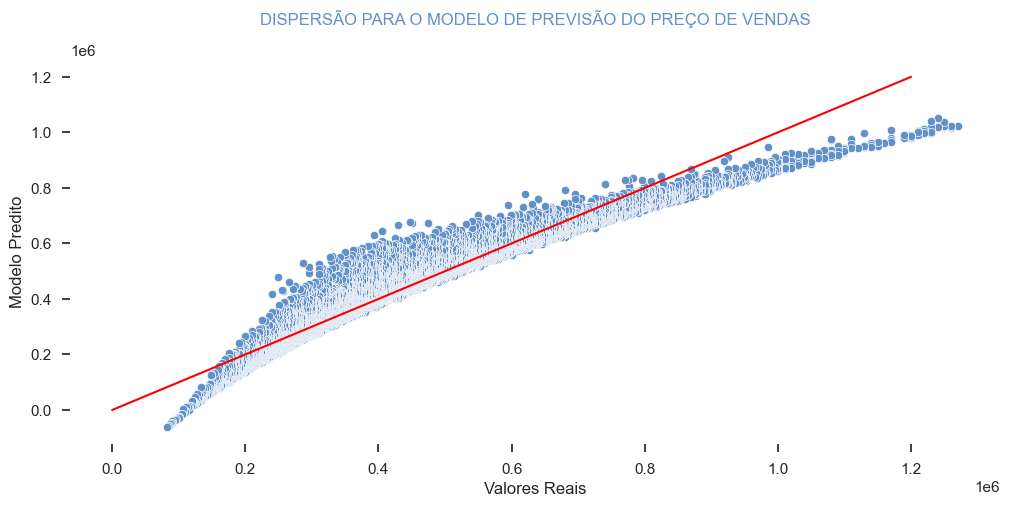

In [45]:
# Grafico de Dispersão para o novo modelo

sns.set_theme(style='ticks')
f, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(x=y_train, y=y_pred, color='#6290C8')

x_plot = np.linspace(0, 1.2e6, 100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='Red')
ax.set(xlabel='Valores Reais', ylabel='Modelo Predito')
plt.title( 'DISPERSÃO PARA O MODELO DE PREVISÃO DO PREÇO DE VENDAS', pad=25, fontsize=12, color='#6290C8' )
sns.despine(left=True, bottom=True);

plt.show()

#### Resultado e Análise do Resídual com Plot Predict Values e Distribution
   - Com esse gráfico, podemos ver que nosso modelo resísual é randômico, e consegue-se ver que as predições são mais assertivas em imóveis cujo valor é maior
   - Fazendo os ajustes, nosso eixo Y ficará em 0 e o X aponstando seu inclinamento para o nível entre 5 e 6 da tabela predict value, falta pouco ajuste.
--- 
#### Considerações gerais sobre os modelos criados de Regressão Linear
   -  Consegui resuzir o erro da previsão de 127mil e 25%, para 95mil e 21%. Isso só foi possível com os novos ajustes de atributos e criação da variável idade_imóvel, exclusão de variáveis que não agregavam valor para análise e predição do modelo aplicado.
   
   - `Farei mais ajustes até que o modelo torne-se mais assertivo, com uma média de (10%) será mais aceitável`

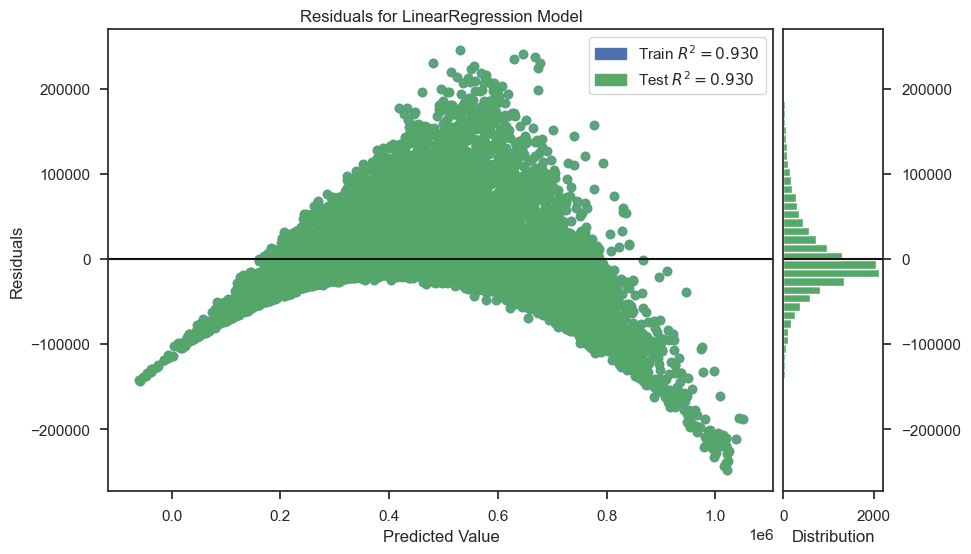

In [46]:
# Residuas do modelo aplicado dos dados de treinamento e teste

fig, ax = plt.subplots(figsize=(10, 6))
pred = residuals_plot( linear_model.LinearRegression(), X_train, y_train, is_fitted=False )

plt.show()

### Python StatsModels 

   - statsmodels é um módulo Python que fornece classes e funções para a estimativa de muitos modelos estatísticos diferentes, bem como para a realização de testes estatísticos e exploração de dados estatísticos. Uma extensa lista de estatísticas de resultados está disponível para cada estimador. Os resultados são testados em relação aos pacotes estatísticos existentes para garantir que estejam corretos. O pacote é lançado sob a licença BSD modificada (3 cláusulas) de código aberto. 
   - Farei alguns testes e criarei algumas análises para explorar ainda os modelos através de análises estatísticas com `StatsModel`

In [47]:
# Lendo o dfp, "DataFramePredição", criado anteriormente e passando para df_modelo, criando outra variável de python para os modelos

df_modelo = dfp
df_modelo.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,...,idade_imovel,m²_living,valor_m²_const,valor_m²_imovel,diff15_abs,predicao,erro,erro_abs,erro_perc,erro_perc_abs
19957,1270000.000,3,2.500,3060,9576,2.000,0,3,10,3060,...,17,281.520,4511.225,132.623,0.000,1012587.303,257412.697,257412.697,0.203,0.203
12021,1260000.000,4,2.000,2970,5400,2.500,0,4,9,2970,...,122,273.240,4611.331,233.333,0.188,1022528.060,237471.940,237471.940,0.188,0.188
15754,1260000.000,4,2.500,3150,13700,2.000,0,4,9,3150,...,56,289.800,4347.826,91.971,-0.016,995070.253,264929.747,264929.747,0.210,0.210


In [48]:
# Separando a coluna preços (price), passando para "y"

y = 'price'
df_modelo.drop([y], axis=1).head(3)

modelo = sm.OLS( df_modelo[y], df_modelo.drop( [y], axis=1 ) )
resultado = modelo.fit()
print( resultado.summary() )

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.226e+29
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:39:41   Log-Likelihood:             2.4122e+05
No. Observations:               14028   AIC:                        -4.824e+05
Df Residuals:                   14005   BIC:                        -4.822e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
bedrooms         6.068e-07   1.26e-10   48

### Reprocessando com statsModels

In [49]:
# Implementadando Stats Modelo para validar alguns indicadores do modelo

X = dfp.drop( [y], axis=1 )
scaler = StandardScaler() 
normalized_X = scaler.fit_transform( X )

modelo = sm.OLS( dfp[y], normalized_X )
resultado = modelo.fit()

print( resultado.summary() )

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.473
Model:                            OLS   Adj. R-squared (uncentered):              0.472
Method:                 Least Squares   F-statistic:                              570.6
Date:                Sun, 18 Sep 2022   Prob (F-statistic):                        0.00
Time:                        20:39:42   Log-Likelihood:                     -1.9877e+05
No. Observations:               14028   AIC:                                  3.976e+05
Df Residuals:                   14006   BIC:                                  3.977e+05
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Reprocessando com Regressão Linear para validar alguns dados estatísticos

In [50]:
# Implementando outros modelos de análise

X_train, X_val, y_train, y_val = train_test_split(X, dfp[y], test_size= 0.30, random_state= 0) 
print( X_train.shape, X_val.shape, y_train.shape, y_val.shape )

modelo = LinearRegression( normalize=False )
modelo = LinearRegression(fit_intercept=True, normalize=False)
modelo.fit( X_train, y_train )

pred = modelo.predict( X_val )

(9819, 27) (4209, 27) (9819,) (4209,)


In [51]:
np.sqrt( mean_squared_error( y_val, pred ) )

1.6741421017071132e-09

In [52]:
mean_squared_error( y_val, pred ) 

2.8027517767083103e-18

In [53]:
print( modelo.coef_ )

[ 6.08588421e-07  5.30143760e-07  1.44622626e-08  4.64308419e-11
 -1.24197161e-06  2.37854061e-06  9.00519335e-07  2.11607063e-06
  6.93732095e-09  7.52494160e-09 -8.97256072e-09  6.62363528e-10
 -8.29977932e-09  5.04639658e-06  3.04758187e-06  4.74782270e-09
  4.04804762e-11  8.97256072e-09  1.33052815e-09  1.82274918e-08
  3.40146243e-08  8.83597496e-06  1.00000000e+00  1.00000000e+00
 -8.53807757e-16  2.99031269e-11  2.99031269e-11]


In [54]:
X_train, X_val, y_train, y_val = train_test_split(X, dfp[y], test_size= 0.30, random_state= 0) 
print( X_train.shape, X_val.shape, y_train.shape, y_val.shape )

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

modelo = LinearRegression(fit_intercept=True, normalize=False)
modelo.fit(X_train_scaled, y_train)

pred = modelo.predict( X_val_scaled )

(9819, 27) (4209, 27) (9819,) (4209,)


In [55]:
np.sqrt( mean_squared_error( y_val, pred ) )

1.380578720329194e-09

In [56]:
mean_squared_error( y_val, pred ) 

1.905997603025795e-18

In [57]:
print( modelo.coef_ )

[ 1.55212946e+01  1.14821642e+01  1.65796794e+02  1.45784358e+01
 -2.01297573e+01  9.23432240e+00  1.40107734e+01  6.43858198e+01
  1.25292747e+02  7.17814586e+01 -8.38994171e+00  8.28302474e+00
 -1.51007504e+01  2.49485138e+01  1.43410340e+01  8.53205706e+01
  1.03612733e+01  8.38994171e+00  1.65796794e+02  5.54104290e+02
  5.77386950e+01  7.83110429e+01  1.79485971e+05  4.66656338e+04
 -6.52300543e-11 -1.53437222e-10  3.25583061e-10]


### Considerações Finais

  - Creio ter conseguido conduzir os processos, mas ainda restaram alguma dúvidas com relação aos modelos e métricas, perfeitamente normal.
  
  - Pelo entendimento que tive, estudando e fazendo laboratórios, tenho impressão que consegui, principamente no pré-processamento e engenharia de atributos, acertar nas decisões feitas, bem como plano para execução dos trabalhos.
  
  - Entendi pelo menos nesse momento, que não existe um modelo perfeito, são muitas as variáveis em jogo, mas com certeza já tirei grandes lições com esse conjunto de dados.
  
 

In [58]:
print('Dbian Technology For Business',
            '\nBlumenau - SC\n'),
print('\n''Claudio Fabian Stychnicki',
            '\n''Data Scientist''\n',
            '\n''Phone: (47) 9-92374737',
            '\n''Informações complementares em meu linkedIn''\n',
            '\n''Best regards;')

Dbian Technology For Business 
Blumenau - SC


Claudio Fabian Stychnicki 
Data Scientist
 
Phone: (47) 9-92374737 
Informações complementares em meu linkedIn
 
Best regards;


### Até o próximo...Já sendo planejado